<a href="https://colab.research.google.com/github/galanghanaf/matkul-pda/blob/main/065119164_Galang_Hanafi_UTS_PDA_Gabungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS MATA KULIAH PDA GABUNGAN**
### Nama : Galang Hanafi
### NPM  : 065119164

# **Import Library**

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as st

## **Data Sources**

In [2]:
# dataset ini diambil dari google sheet yang kemudian saya simpan melalui github
url = "https://github.com/galanghanaf/matkul-pda/blob/main/uts-pda/transaksi_pelanggan.xlsx?raw=true"
df_transaksi_pelanggan = pd.read_excel(url, sheet_name="Sheet1")

In [3]:
df_transaksi_pelanggan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_customer                150 non-null    float64
 1   cabang                     150 non-null    object 
 2   mempunyai_usaha            150 non-null    object 
 3   lama_menjadi_customer      150 non-null    float64
 4   umur                       150 non-null    float64
 5   pendapatan                 150 non-null    float64
 6   lama_bekerja               124 non-null    float64
 7   sumber_dana                135 non-null    object 
 8   jumlah_transaksi           150 non-null    float64
 9   n_hari_terakhir_transaksi  150 non-null    float64
 10  nilai_transaksi            150 non-null    float64
 11  profesi                    150 non-null    object 
 12  jumlah_tanggungan          45 non-null     float64
dtypes: float64(9), object(4)
memory usage: 15.4+ KB


# **A. Menjelaskan tipe data (nominal, ordinal, interval, ratio)**

**Tipe data Nominal** disebut data skala nominal adalah data yang diperoleh dengan cara kategorisasi atau klasifikasi, cirinya posisi data tersebut setara. Dalam dataset ini variable yang termasuk tipe data nominal yaitu ***profesi***.

**Tipe data Ordinal** adalah data yang diperoleh dengan cara kategorisasi atau klasifikasi, tetapi diantara data tersebut terdapat hubungan, cirinya posisi data tersebut tidak setara. Didalam dataset ini yang termasuk tipe data ordinal yaitu variable ***mempunyai_usaha***.

**Tipe data Interval** adalah data yang diperoleh dengan cara pengukuran, di mana jarak antara dua titik skala sudah diketahui. Tidak ada kategorisasi dan bisa dilakukan operasi matematika. Didalam dataset ini yang termasuk tipe data interval yaitu **lama_menjadi_customer**, **umur**, **pendapatan**, **lama_bekerja**, **jumlah_transaksi**, **nilai_transaksi**, **jumlah_tanggungan**.

**Tipe data Ratio**: data yang diperoleh dengan cara pengukuran, di mana jarak antara dua titik skala sudah diketahui dan mempunyai titik 0 absolut. tidak ada kategorisasi dan bisa dilakukan operasi matematika. Didalam dataset ini yang termasuk tipe data ratio yaitu **lama_menjadi_customer**, **umur**, **pendapatan**, **lama_bekerja**, **jumlah_transaksi**, **nilai_transaksi**, **jumlah_tanggungan**.

In [4]:
df_transaksi_pelanggan.describe()

,id_customer,lama_menjadi_customer,umur,pendapatan,lama_bekerja,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,jumlah_tanggungan
count,150.000000,150.000000,150.000000,1.500000e+02,124.000000,150.000000,150.000000,1.500000e+02,45.000000
mean,75.500000,13.600000,37.833333,2.516100e+10,15.088710,8.173333,181.393333,1.507961e+07,14.222222
std,43.445368,7.345729,11.811391,3.141334e+10,8.517807,9.820364,129.576486,2.913841e+07,18.765162
min,1.000000,1.000000,18.000000,3.083562e+06,2.000000,1.000000,1.000000,3.980000e+04,1.000000
25%,38.250000,8.000000,29.000000,4.829213e+07,7.000000,2.000000,30.250000,8.792250e+05,2.000000
50%,75.500000,14.500000,35.000000,3.757912e+09,16.000000,4.500000,249.000000,5.395750e+06,7.000000
75%,112.750000,20.000000,43.000000,4.947510e+10,22.250000,10.000000,291.000000,1.392570e+07,18.000000
max,150.000000,25.000000,82.000000,9.992396e+10,30.000000,63.000000,430.000000,1.872440e+08,100.000000


In [5]:
df_transaksi_pelanggan.head()

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1.0,TANJUNGPINANG TIMUR,Ya,24.0,27.0,7.631578e+10,23.0,Gaji,4.0,3.0,5286900.0,TNI / POLRI,NaN
1,2.0,MAHAMERU,Tidak,10.0,22.0,4.457962e+07,9.0,Gaji,4.0,29.0,435200.0,Pelajar / Mahasiswa,NaN
2,3.0,BRASTAGI,Ya,16.0,47.0,6.566416e+10,17.0,Hasil Usaha,15.0,25.0,97689000.0,Petani,NaN
3,4.0,TANJUNG MORAWA,Tidak,25.0,44.0,3.183027e+07,NaN,Hasil Usaha,6.0,17.0,7915200.0,Ibu Rumah Tangga,2.0
4,5.0,SUZUYA PLAZA,Tidak,8.0,39.0,3.549522e+07,16.0,Gaji,29.0,18.0,45360900.0,Profesional,NaN


In [6]:
df_transaksi_pelanggan.tail()

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
145,146.0,PASAR DURIAN,Ya,16.0,27.0,3.734460e+10,28.0,Hasil Usaha,1.0,296.0,39800.0,Pelajar / Mahasiswa,NaN
146,147.0,SIMPANG EMPAT,Tidak,2.0,38.0,8.483873e+07,NaN,Gaji,3.0,261.0,6513000.0,PNS,NaN
147,148.0,TIBAN INDAH,Ya,7.0,49.0,3.714131e+10,2.0,Hasil Usaha,1.0,326.0,333600.0,Lainnya,15.0
148,149.0,TAPI BANDAR,Ya,1.0,33.0,6.881605e+10,18.0,Gaji,15.0,305.0,14540200.0,Ibu Rumah Tangga,NaN
149,150.0,ULAK KARANG,Tidak,16.0,39.0,2.028289e+07,10.0,Hasil Usaha,8.0,228.0,13932400.0,Ibu Rumah Tangga,NaN


# **B. Menjelaskan central tendencies dari setiap variable**

***Central Tendency (Tendensi Sentral)*** merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean(rata-rata), Median(nilai tengah), dan Modus(nilai yang sering muncul) adalah ukuran Central Tendency yang paling umum digunakan. Ketiganya menunjukkan lokasi berkumpulnya data, namun dengan metode dan makna yang berbeda.

Untuk variable id_customer tidak dapat dihitung menggunakan ***central tendencies***, karena id_customer ini hanyalah sebuah angka yang membedakan customer yang satu dengan customer lainya agar tidak terjadi penduplikasian data.

Lalu di dalam dataset ini terdapat 8 variabel yang dapat dihitung menggunakan ***central tendencies***, diataranya adalah : 

* **Variable lama_menjadi_customer** : variable ini memiliki nilai mean(13.6), median(35) dan modus(16 ,18, 22).
* **Variable umur** : variable ini memiliki nilai mean(37.83), median(35), modus(33).
* **Variable pendapatan** : variable ini memiliki nilai mean(25160998897.26), median(3757912475), modus(3083562, 4832792, 6121344, 6971779, dan 7227381)
* **Variable lama_bekerja** : variable ini memiliki nilai mean(15.1), median(15.1), modus(15.1).
* **Variable jumlah_transaksi** : variable ini memiliki nilai mean(8.2), median(4.5), modus(1).
* **Variable n_hari_terakhir_transaksi** : variable ini memiliki nilai mean(181.4), median(249), modus(277).
* **Variable nilai_transaksi** : variable ini memiliki nilai mean(15079608), median(5395750), modus(145800 dan 285600).
* **Variable jumlah_tanggungan** : variable ini memiliki nilai mean(14.82), median(15.1), modus(15.1).

Selanjutnya berikut ini adalah variable yang tidak dapat dihitung menggunakan ***central tendencies*** dikarenakan isi dari variable tersebut berisikan record text. Berikut ini adalah variable-variablenya : 
* **Variable cabang** : isi dari variabel ini mengenai lokasi cabang.
* **Variable mempunyai_usaha** : isi dari variabel ini mengenai customer itu memiliki usaha atau tidak memiliki usaha.
* **Variable sumber_dana** : isi dari variabel ini mengenai sumber dana.
* **variable profesi** : isi dari variabel ini mengenai profesi yang dimiliki customer.

In [7]:
# variable lama_menjadi_customer
df_transaksi_pelanggan['lama_menjadi_customer'].mean()
df_transaksi_pelanggan['lama_menjadi_customer'].median()
df_transaksi_pelanggan['lama_menjadi_customer'].mode()
print(f'mean : {df_transaksi_pelanggan["lama_menjadi_customer"].mean()}')
print(f'median : {df_transaksi_pelanggan["lama_menjadi_customer"].median()}')
print(f'modus : {df_transaksi_pelanggan["lama_menjadi_customer"].mode()}')

mean : 13.6
median : 14.5
modus : 0    16.0
1    18.0
2    22.0
dtype: float64


In [8]:
# variable umur
df_transaksi_pelanggan['umur'].mean()
df_transaksi_pelanggan['umur'].median()
df_transaksi_pelanggan['umur'].mode()
print(f'mean : {df_transaksi_pelanggan["umur"].mean()}')
print(f'median : {df_transaksi_pelanggan["umur"].median()}')
print(f'modus : {df_transaksi_pelanggan["umur"].mode()}')

mean : 37.833333333333336
median : 35.0
modus : 0    33.0
dtype: float64


In [9]:
# variable pendapat
df_transaksi_pelanggan['pendapatan'].mean()
df_transaksi_pelanggan['pendapatan'].median()
df_transaksi_pelanggan['pendapatan'].mode()
print(f'mean : {df_transaksi_pelanggan["pendapatan"].mean()}')
print(f'median : {df_transaksi_pelanggan["pendapatan"].median()}')
print(f'modus : {df_transaksi_pelanggan["pendapatan"].mode()}')

mean : 25160998897.266666
median : 3757912475.0
modus : 0      3.083562e+06
1      4.832792e+06
2      6.121344e+06
3      6.971779e+06
4      7.227381e+06
           ...     
145    9.372470e+10
146    9.444881e+10
147    9.725722e+10
148    9.895225e+10
149    9.992396e+10
Length: 150, dtype: float64


In [10]:
# variable lama_bekerja
df_transaksi_pelanggan['lama_bekerja'].mean()
df_transaksi_pelanggan['lama_bekerja'].median()
df_transaksi_pelanggan['lama_bekerja'].mode()
print(f'mean : {df_transaksi_pelanggan["lama_bekerja"].mean()}')
print(f'median : {df_transaksi_pelanggan["lama_bekerja"].median()}')
print(f'modus : {df_transaksi_pelanggan["lama_bekerja"].mode()}')

mean : 15.088709677419354
median : 16.0
modus : 0    2.0
1    4.0
dtype: float64


In [11]:
# variable jumlah_transaksi
df_transaksi_pelanggan['jumlah_transaksi'].mean()
df_transaksi_pelanggan['jumlah_transaksi'].median()
df_transaksi_pelanggan['jumlah_transaksi'].mode()
print(f'mean : {df_transaksi_pelanggan["jumlah_transaksi"].mean()}')
print(f'median : {df_transaksi_pelanggan["jumlah_transaksi"].median()}')
print(f'modus : {df_transaksi_pelanggan["jumlah_transaksi"].mode()}')

mean : 8.173333333333334
median : 4.5
modus : 0    1.0
dtype: float64


In [12]:
# variable n_hari_terakhir_transaksi
df_transaksi_pelanggan['n_hari_terakhir_transaksi'].mean()
df_transaksi_pelanggan['n_hari_terakhir_transaksi'].median()
df_transaksi_pelanggan['n_hari_terakhir_transaksi'].mode()
print(f'mean : {df_transaksi_pelanggan["n_hari_terakhir_transaksi"].mean()}')
print(f'median : {df_transaksi_pelanggan["n_hari_terakhir_transaksi"].median()}')
print(f'modus : {df_transaksi_pelanggan["n_hari_terakhir_transaksi"].mode()}')

mean : 181.39333333333335
median : 249.0
modus : 0    277.0
dtype: float64


In [13]:
# variable nilai_transaksi
df_transaksi_pelanggan['nilai_transaksi'].mean()
df_transaksi_pelanggan['nilai_transaksi'].median()
df_transaksi_pelanggan['nilai_transaksi'].mode()
print(f'mean : {df_transaksi_pelanggan["nilai_transaksi"].mean()}')
print(f'median : {df_transaksi_pelanggan["nilai_transaksi"].median()}')
print(f'modus : {df_transaksi_pelanggan["nilai_transaksi"].mode()}')

mean : 15079608.0
median : 5395750.0
modus : 0    145800.0
1    285600.0
dtype: float64


In [14]:
# variable jumlah_tanggungan
df_transaksi_pelanggan['jumlah_tanggungan'].mean()
df_transaksi_pelanggan['jumlah_tanggungan'].median()
df_transaksi_pelanggan['jumlah_tanggungan'].mode()
print(f'mean : {df_transaksi_pelanggan["jumlah_tanggungan"].mean()}')
print(f'median : {df_transaksi_pelanggan["jumlah_tanggungan"].median()}')
print(f'modus : {df_transaksi_pelanggan["jumlah_tanggungan"].mode()}')

mean : 14.222222222222221
median : 7.0
modus : 0    1.0
dtype: float64


# **C. Handle missing values**

In [15]:
# menampilkan variable yang memiliki missing value

print(df_transaksi_pelanggan.isnull().sum()) 

id_customer                    0
cabang                         0
mempunyai_usaha                0
lama_menjadi_customer          0
umur                           0
pendapatan                     0
lama_bekerja                  26
sumber_dana                   15
jumlah_transaksi               0
n_hari_terakhir_transaksi      0
nilai_transaksi                0
profesi                        0
jumlah_tanggungan            105
dtype: int64


In [16]:
# melakukan handle misssing values pada variable lama_bekerja dan jumlah_tanggunan
# dengan cara mengganti nilai missing dengan nilai mean (rata-rata).
mean_lama_bekerja = df_transaksi_pelanggan['lama_bekerja'].mean()
df_transaksi_pelanggan['lama_bekerja'] = df_transaksi_pelanggan['lama_bekerja'].fillna(mean_lama_bekerja)
df_transaksi_pelanggan['lama_bekerja'].isna().sum()

mean_jumlah_tanggungan = df_transaksi_pelanggan['jumlah_tanggungan'].mean()
df_transaksi_pelanggan['jumlah_tanggungan'] = df_transaksi_pelanggan['jumlah_tanggungan'].fillna(mean_jumlah_tanggungan)
df_transaksi_pelanggan['jumlah_tanggungan'].isna().sum()

0

In [17]:
# melakukan handle misssing values pada variable sumber_dana 
# dengan cara mengganti nilai missing dengan menambahkan text Simpanan.

df_transaksi_pelanggan['sumber_dana'].fillna ("Simpanan", inplace=True)

In [18]:
# mengecek variable apakah masih memiliki missing value
print(df_transaksi_pelanggan.isnull().sum()) 

id_customer                  0
cabang                       0
mempunyai_usaha              0
lama_menjadi_customer        0
umur                         0
pendapatan                   0
lama_bekerja                 0
sumber_dana                  0
jumlah_transaksi             0
n_hari_terakhir_transaksi    0
nilai_transaksi              0
profesi                      0
jumlah_tanggungan            0
dtype: int64


In [19]:
# menampilkan dataset
df_transaksi_pelanggan.head(15)

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1.0,TANJUNGPINANG TIMUR,Ya,24.0,27.0,7.631578e+10,23.00000,Gaji,4.0,3.0,5286900.0,TNI / POLRI,14.222222
1,2.0,MAHAMERU,Tidak,10.0,22.0,4.457962e+07,9.00000,Gaji,4.0,29.0,435200.0,Pelajar / Mahasiswa,14.222222
2,3.0,BRASTAGI,Ya,16.0,47.0,6.566416e+10,17.00000,Hasil Usaha,15.0,25.0,97689000.0,Petani,14.222222
3,4.0,TANJUNG MORAWA,Tidak,25.0,44.0,3.183027e+07,15.08871,Hasil Usaha,6.0,17.0,7915200.0,Ibu Rumah Tangga,2.000000
4,5.0,SUZUYA PLAZA,Tidak,8.0,39.0,3.549522e+07,16.00000,Gaji,29.0,18.0,45360900.0,Profesional,14.222222
5,6.0,SIMPANG LIMUN,Tidak,9.0,39.0,6.204580e+07,17.00000,Gaji,10.0,18.0,35144000.0,Lainnya,14.222222
6,7.0,PERJUANGAN,Tidak,8.0,29.0,1.550365e+07,5.00000,Gaji,28.0,2.0,46139000.0,Karyawan Swasta,14.222222
7,8.0,KISARAN,Tidak,16.0,51.0,6.785882e+07,9.00000,Gaji,4.0,46.0,900600.0,Ibu Rumah Tangga,14.222222
8,9.0,KISARAN,Tidak,11.0,51.0,3.083562e+06,11.00000,Hasil Usaha,4.0,46.0,900600.0,Ibu Rumah Tangga,14.222222
9,10.0,PORSEA,Tidak,11.0,56.0,3.604492e+07,8.00000,Gaji,6.0,28.0,30739800.0,Ibu Rumah Tangga,2.000000


# **D. Scaling Data**

In [20]:
df_transaksi_pelanggan["lama_menjadi_customer"] = df_transaksi_pelanggan["lama_menjadi_customer"] / df_transaksi_pelanggan["lama_menjadi_customer"].max()
df_transaksi_pelanggan["umur"] = df_transaksi_pelanggan["umur"] / df_transaksi_pelanggan["umur"].max()
df_transaksi_pelanggan["pendapatan"] = df_transaksi_pelanggan["pendapatan"] / df_transaksi_pelanggan["pendapatan"].max()
df_transaksi_pelanggan["lama_bekerja"] = df_transaksi_pelanggan["lama_bekerja"] / df_transaksi_pelanggan["lama_bekerja"].max()
df_transaksi_pelanggan["jumlah_transaksi"] = df_transaksi_pelanggan["jumlah_transaksi"] / df_transaksi_pelanggan["jumlah_transaksi"].max()
df_transaksi_pelanggan["n_hari_terakhir_transaksi"] = df_transaksi_pelanggan["n_hari_terakhir_transaksi"] / df_transaksi_pelanggan["n_hari_terakhir_transaksi"].max()
df_transaksi_pelanggan["nilai_transaksi"] = df_transaksi_pelanggan["nilai_transaksi"] / df_transaksi_pelanggan["nilai_transaksi"].max()
df_transaksi_pelanggan["jumlah_tanggungan"] = df_transaksi_pelanggan["jumlah_tanggungan"] / df_transaksi_pelanggan["jumlah_tanggungan"].max()

In [21]:
df_transaksi_pelanggan.head(15)

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1.0,TANJUNGPINANG TIMUR,Ya,0.96,0.329268,0.763739,0.766667,Gaji,0.063492,0.006977,0.028235,TNI / POLRI,0.142222
1,2.0,MAHAMERU,Tidak,0.40,0.268293,0.000446,0.300000,Gaji,0.063492,0.067442,0.002324,Pelajar / Mahasiswa,0.142222
2,3.0,BRASTAGI,Ya,0.64,0.573171,0.657141,0.566667,Hasil Usaha,0.238095,0.058140,0.521720,Petani,0.142222
3,4.0,TANJUNG MORAWA,Tidak,1.00,0.536585,0.000319,0.502957,Hasil Usaha,0.095238,0.039535,0.042272,Ibu Rumah Tangga,0.020000
4,5.0,SUZUYA PLAZA,Tidak,0.32,0.475610,0.000355,0.533333,Gaji,0.460317,0.041860,0.242256,Profesional,0.142222
5,6.0,SIMPANG LIMUN,Tidak,0.36,0.475610,0.000621,0.566667,Gaji,0.158730,0.041860,0.187691,Lainnya,0.142222
6,7.0,PERJUANGAN,Tidak,0.32,0.353659,0.000155,0.166667,Gaji,0.444444,0.004651,0.246411,Karyawan Swasta,0.142222
7,8.0,KISARAN,Tidak,0.64,0.621951,0.000679,0.300000,Gaji,0.063492,0.106977,0.004810,Ibu Rumah Tangga,0.142222
8,9.0,KISARAN,Tidak,0.44,0.621951,0.000031,0.366667,Hasil Usaha,0.063492,0.106977,0.004810,Ibu Rumah Tangga,0.142222
9,10.0,PORSEA,Tidak,0.44,0.682927,0.000361,0.266667,Gaji,0.095238,0.065116,0.164170,Ibu Rumah Tangga,0.020000


# **E. Segmentasi menggunakan teknik clustering terhadap variabel R-F-M dari data tersebut.**

**R-F-M** (RFM Analysis) adalah proses penilaian yang dimana kita mengurutkan pelanggan ke dalam kelompok sasaran atau segmen menggunakan KPI yang berbeda. Ini bertujuan untuk mengidentifikasi pelanggan yang paling mungkin untuk menanggapi berbagai metode pemasaran yang berbeda.

R-F-M  digunakan untuk membantu membedakan object yang berpengaruh terhadap data dengan membutuhkan tiga variable, yaitu recency, frekuensi, dan total monetary.

* Variabel Recency adalah teknik untuk mengidentifikasi pelanggan yang telah membeli sesuatu baru-baru ini.
* Variabel Frequency adalah teknik untuk mengidentifikasi seberapa sering pelanggan tersebut melakukan transaksi.
* Variabel Monetary adalah teknik untuk mengidentifikasi seberapa besar jumlah transaksi yang dilakukan.

Dari 3 Variable R-F-M, berikut adalah variable yang saya ambil dari dataset
* **Variable Recenccy n_hari_terakhir_transaksi**
* **Variabel Frequency adalah variabel jumlah_transaksi**
* **Variabel Monetary adalah variabel nilai_transaksi**

In [22]:
# Recency
df_customer_recency = pd.DataFrame(df_transaksi_pelanggan.groupby("id_customer")["n_hari_terakhir_transaksi"].max()).reset_index()
df_customer_recency = df_customer_recency.rename(columns={"n_hari_terakhir_transaksi": "recency"})
df_features = df_customer_recency

# Frequency
df_customer_frequency = pd.DataFrame(df_transaksi_pelanggan.groupby("id_customer")["jumlah_transaksi"].max()).reset_index()
df_customer_frequency = df_customer_frequency.rename(columns={"jumlah_transaksi": "frequency"})
df_features = df_features.merge(df_customer_frequency, on="id_customer")

# Monetary
df_customer_monetary = pd.DataFrame(df_transaksi_pelanggan.groupby("id_customer")["nilai_transaksi"].max()).reset_index()
df_customer_monetary = df_customer_monetary.rename(columns={"nilai_transaksi": "monetary"})
df_features = df_features.merge(df_customer_monetary, on="id_customer")

In [23]:
df_features.head(10)

,id_customer,recency,frequency,monetary
0,1.0,0.006977,0.063492,0.028235
1,2.0,0.067442,0.063492,0.002324
2,3.0,0.058140,0.238095,0.521720
3,4.0,0.039535,0.095238,0.042272
4,5.0,0.041860,0.460317,0.242256
5,6.0,0.041860,0.158730,0.187691
6,7.0,0.004651,0.444444,0.246411
7,8.0,0.106977,0.063492,0.004810
8,9.0,0.106977,0.063492,0.004810
9,10.0,0.065116,0.095238,0.164170


## Analisa R-F-M Quartile

In [24]:
# Quartil Recency
df_customer_recency.describe()

,id_customer,recency
count,150.000000,150.000000
mean,75.500000,0.421845
std,43.445368,0.301341
min,1.000000,0.002326
25%,38.250000,0.070349
50%,75.500000,0.579070
75%,112.750000,0.676744
max,150.000000,1.000000


In [25]:
df_customer_recency.recency.quantile([0.25,0.5,0.75])

0.25    0.070349
0.50    0.579070
0.75    0.676744
Name: recency, dtype: float64

In [26]:
# Quartile Frequency
df_customer_frequency.describe()

,id_customer,frequency
count,150.000000,150.000000
mean,75.500000,0.129735
std,43.445368,0.155879
min,1.000000,0.015873
25%,38.250000,0.031746
50%,75.500000,0.071429
75%,112.750000,0.158730
max,150.000000,1.000000


In [27]:
df_customer_frequency.frequency.quantile([0.25,0.5,0.75])

0.25    0.031746
0.50    0.071429
0.75    0.158730
Name: frequency, dtype: float64

In [28]:
# Quartil Monetary
df_customer_monetary.describe()

,id_customer,monetary
count,150.000000,150.000000
mean,75.500000,0.080535
std,43.445368,0.155617
min,1.000000,0.000213
25%,38.250000,0.004696
50%,75.500000,0.028817
75%,112.750000,0.074372
max,150.000000,1.000000


In [29]:
df_customer_monetary.monetary.quantile([0.25,0.5,0.75])

0.25    0.004696
0.50    0.028817
0.75    0.074372
Name: monetary, dtype: float64

## Modeling R-F-M

In [30]:
df_RFM = df_customer_recency.merge(df_customer_frequency, left_on="id_customer", right_on="id_customer").\
                             merge(df_customer_monetary, left_on="id_customer", right_on="id_customer")

In [31]:
df_RFM.columns = ["id_customer", "recency",	"frequency", "monetary"]
df_RFM.head()

,id_customer,recency,frequency,monetary
0,1.0,0.006977,0.063492,0.028235
1,2.0,0.067442,0.063492,0.002324
2,3.0,0.058140,0.238095,0.521720
3,4.0,0.039535,0.095238,0.042272
4,5.0,0.041860,0.460317,0.242256


In [32]:
def get_R_score(recency):
# 0.25    0.070349
# 0.50    0.579070
# 0.75    0.676744

  if recency >= 0 and recency <= 0.070349:
    return 1
  elif recency > 0.070349 and recency <= 0.579070:
    return 2
  elif recency > 0.579070 and recency <= 0.676744:
    return 3
  elif recency > 0.676744:
    return 4

def get_F_score(frequency):
  # 0.25    0.031746
  # 0.50    0.071429
  # 0.75    0.158730
  if frequency >= 0 and frequency <= 0.031746:
    return 1
  elif frequency > 0.031746 and frequency <= 0.071429:
    return 2
  elif frequency > 0.071429 and frequency <= 0.158730:
    return 3
  elif frequency > 0.158730:
    return 4


def get_M_score(monetary):
  # 0.25     0.004696
  # 0.50     0.028817
  # 0.75     0.074372
  if monetary >= 0 and monetary <= 0.004696:
    return 1
  elif monetary > 0.004696 and monetary <= 0.028817:
    return 2
  elif monetary > 0.028817 and monetary <= 0.074372:
    return 3
  elif monetary > 0.074372:
    return 4

df_RFM["R_score"] = df_RFM.apply(lambda x:get_R_score(x["recency"]), axis=1)
df_RFM["F_score"] = df_RFM.apply(lambda x:get_F_score(x["frequency"]), axis=1)
df_RFM["M_score"] = df_RFM.apply(lambda x:get_M_score(x["monetary"]), axis=1)

In [33]:
df_RFM.head(10)

,id_customer,recency,frequency,monetary,R_score,F_score,M_score
0,1.0,0.006977,0.063492,0.028235,1,2,2
1,2.0,0.067442,0.063492,0.002324,1,2,1
2,3.0,0.058140,0.238095,0.521720,1,4,4
3,4.0,0.039535,0.095238,0.042272,1,3,3
4,5.0,0.041860,0.460317,0.242256,1,4,4
5,6.0,0.041860,0.158730,0.187691,1,4,4
6,7.0,0.004651,0.444444,0.246411,1,4,4
7,8.0,0.106977,0.063492,0.004810,2,2,2
8,9.0,0.106977,0.063492,0.004810,2,2,2
9,10.0,0.065116,0.095238,0.164170,1,3,4


In [34]:
df_customer_segment = pd.DataFrame(df_RFM.groupby(["R_score", "F_score", "M_score"])["id_customer"].count())
df_customer_segment

id_customer
R_score F_score M_score             
1       2       1                  3
                2                  1
        3       2                  1
                3                  5
                4                  4
        4       2                  2
                3                  4
                4                 18
2       1       1                  2
        2       1                  3
                2                 11
                3                  2
        3       3                  4
                4                  5
        4       2                  2
                3                  8
                4                  3
3       1       1                 10
        2       1                  3
                2                  8
                3                  4
        3       2                  1
                3                  3
                4                  2
        4       2                  1
                3                  1
4       1       1                 13
        2       1                  4
                2                  7
                3                  2
                4                  2
        3       2                  3
                3                  4
                4                  3
        4       4                  1

In [35]:
df_customer_segment = df_customer_segment.reset_index()
df_customer_segment

,R_score,F_score,M_score,id_customer
0,1,2,1,3
1,1,2,2,1
2,1,3,2,1
3,1,3,3,5
4,1,3,4,4
5,1,4,2,2
6,1,4,3,4
7,1,4,4,18
8,2,1,1,2
9,2,2,1,3


In [36]:
def get_customer_activity_label(R_score):
  if R_score == 1:
    return "Active"
  elif R_score == 2:
    return "At Risk"
  elif R_score >=3:
    return "Churned"

def get_customer_value_label(F_score, M_score):
  if F_score == 4 and M_score == 4:
    return "Premium"
  elif (F_score >= 2 and F_score <= 4) and (M_score >= 2 and M_score <= 4):
    return "Gold"
  else:
    return "Silver"

df_RFM["customer_activity"] = df_RFM.apply(lambda x:get_customer_activity_label(x["R_score"]), axis=1)
df_RFM["customer_value"] = df_RFM.apply(lambda x:get_customer_value_label(x["F_score"], x["M_score"]), axis=1)

In [37]:
px.treemap(df_RFM, path=["customer_activity", "customer_value" ])

## Machine Learning

In [38]:
selected_features = ['recency','frequency','monetary']
data_selected = df_RFM[selected_features]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_selected)
print(scaled)

[[-1.38135377 -0.42639095 -0.33720146]
 [-1.18002787 -0.42639095 -0.50426458]
 [-1.21100109  0.69748296  2.84456638]
 [-1.27294752 -0.22205024 -0.24669875]
 [-1.26520421  2.12786792  1.04270402]
 [-1.26520421  0.18663118  0.69089596]
 [-1.38909708  2.02569757  1.06949707]
 [-1.04839171 -0.42639095 -0.48823903]
 [-1.04839171 -0.42639095 -0.48823903]
 [-1.18777118 -0.22205024  0.53924202]
 [-1.28843413 -0.11987988  1.57451548]
 [-1.0329051   0.18663118 -0.21282954]
 [-1.21874439  3.25174183  0.92000903]
 [-1.21874439  3.25174183  0.92000903]
 [-1.2264877  -0.32422059 -0.45782009]
 [-1.234231    0.28880154 -0.03666897]
 [-1.38135377 -0.42639095 -0.4892204 ]
 [-1.38135377 -0.42639095 -0.4892204 ]
 [-1.28843413 -0.11987988 -0.24056263]
 [-1.37361047  5.60165999  5.92829737]
 [-0.18888499 -0.63073166 -0.46723089]
 [-0.18888499 -0.63073166 -0.46723089]
 [-1.35812386 -0.01770953  0.07542381]
 [-1.35812386 -0.01770953  0.07542381]
 [-1.11033814 -0.32422059 -0.23723631]
 [-1.26520421  1.31050509

### Pada pembahasan sebelumnya kita sudah menggunakan metode segmentasi menggunakan kuartil, pada pembahasan selanjutnya kita akan melakukan clustering menggunakan metode **K-means**. 

In [40]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(scaled)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

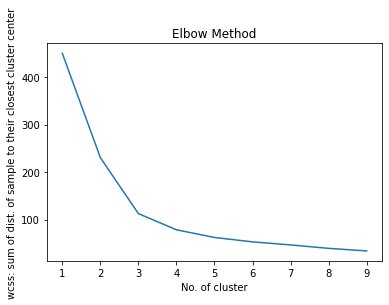

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [42]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(data_selected)
results=kmeans_1.predict(data_selected)
labels=kmeans_1.labels_
centers=kmeans_1.cluster_centers_

In [43]:
df_RFM['cluster'] = results
df_RFM['scaled_R'] = scaled[:,:1]
df_RFM['scaled_F'] = scaled[:,1:2]
df_RFM['scaled_M'] = scaled[:,2:3]
df_RFM

,id_customer,recency,frequency,monetary,R_score,F_score,M_score,customer_activity,customer_value,cluster,scaled_R,scaled_F,scaled_M
0,1.0,0.006977,0.063492,0.028235,1,2,2,Active,Gold,1,-1.381354,-0.426391,-0.337201
1,2.0,0.067442,0.063492,0.002324,1,2,1,Active,Silver,1,-1.180028,-0.426391,-0.504265
2,3.0,0.058140,0.238095,0.521720,1,4,4,Active,Premium,4,-1.211001,0.697483,2.844566
3,4.0,0.039535,0.095238,0.042272,1,3,3,Active,Gold,1,-1.272948,-0.222050,-0.246699
4,5.0,0.041860,0.460317,0.242256,1,4,4,Active,Premium,4,-1.265204,2.127868,1.042704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146.0,0.688372,0.015873,0.000213,4,1,1,Churned,Silver,2,0.887434,-0.732902,-0.517880
146,147.0,0.606977,0.047619,0.034783,3,2,3,Churned,Gold,0,0.616419,-0.528561,-0.294982
147,148.0,0.758140,0.015873,0.001782,4,1,1,Churned,Silver,2,1.119733,-0.732902,-0.507763
148,149.0,0.709302,0.238095,0.077654,4,4,4,Churned,Premium,2,0.957124,0.697483,-0.018574


In [44]:
df_RFM_saved = df_RFM[df_RFM['cluster']==4]

In [45]:
df_RFM_saved.to_csv('df_RFM_cluster0.csv')

In [46]:
px.scatter_3d(data_frame=df_RFM, x='scaled_R', y='scaled_F', z='scaled_M', color='cluster')

In [47]:
df_RFM_group = df_RFM.groupby('cluster').agg({'scaled_R':'mean','scaled_F':'mean','scaled_M':'mean'}).reset_index()
df_RFM_group

,cluster,scaled_R,scaled_F,scaled_M
0,0,0.476245,-0.387095,-0.269001
1,1,-1.143578,-0.000266,-0.121457
2,2,0.987055,-0.508913,-0.369479
3,3,-1.389097,3.830707,5.004625
4,4,-1.256428,2.005263,1.311320


#  **F. Interpretasikan hasil segmentasi tersebut dalam bentuk visualisasi, kaitan masing-masing segmen dengan variabel yang ada.**

In [48]:
import plotly.graph_objects as go
clusters=df_RFM_group['cluster']

fig = go.Figure(data=[
    go.Bar(name='Recency', x=clusters, y=df_RFM_group['scaled_R']),
    go.Bar(name='Frequency', x=clusters, y=df_RFM_group['scaled_F']),
    go.Bar(name='Monetary', x=clusters, y=df_RFM_group['scaled_M']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()